In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
graph = {'s1': ['v', 't1','w'],
     's2': ['t1','s1'],
     's3': ['v','w'],
     's4': ['x','y'],
     'x': ['v','w'],
     'v': ['t1', 'w'],
     'w': ['y','t1','t2'],
     'y': ['v','t1','t2'],
     't1': [],
     't2': [],
     }
graph

{'s1': ['v', 't1', 'w'],
 's2': ['t1', 's1'],
 's3': ['v', 'w'],
 's4': ['x', 'y'],
 'x': ['v', 'w'],
 'v': ['t1', 'w'],
 'w': ['y', 't1', 't2'],
 'y': ['v', 't1', 't2'],
 't1': [],
 't2': []}

Graf se dodeljuje kao recnik, gde je svaki cvor kljuc koji kao vrednost sadrzi listu cvorova sa kojima je povezan.

In [7]:
def nonplanar(G):
    fig = plt.figure()
    fig.show()

    graph = nx.DiGraph()

    for v in G.keys():
        graph.add_node(v)

    for delta in G.items():
        for w in delta[1]:
            graph.add_edge(delta[0],w)
    nx.draw_networkx(graph, with_labels = True, alpha=1)

    fig.canvas.draw()
    plt.show()

nx.DiGraph() pravi prazan usmereni graf.
graph.add_node(v) dodaje cvor v trenutnom grafu.
graph.add_edge(delta[0],w) crta usmerene grane izmedju cvora delta[0] i svakog cvora sa kojim je povezan.

nx.draw_networkx(...) je funkcija koja koristi biblioteku matplotlib za iscrtavanje grafa.
    -kao obavezan parametar prima graf, a dozvoljava dodavanje jos pomocnih parametara za kontrolu izgleda grafa pri iscrtavanju

D:\conda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


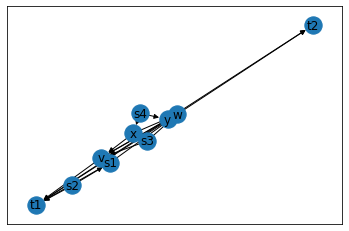

In [10]:
nonplanar(graph)

In [5]:
def planar(G):
    fig = plt.figure()
    fig.show()

    graph = nx.DiGraph()

    for v in G.keys():
        graph.add_node(v)

    for delta in G.items():
        for w in delta[1]:
            graph.add_edge(delta[0],w)

    nx.draw_planar(graph,with_labels = True, alpha=1)
    fig.canvas.draw()
    plt.show()

nx.draw_planar(...) je funkcija koja pokusava da nacrta graf koristeci matplotlib u obliku u kome se njegove grane ne presecaju.
    -Poziva networkx funkciju check_planarity(), koja iscrtava graf kome su svi cvorovi na ivici, a zatim proverava da li postoji presecanje izmedju grana, i ukoliko postoji ona menja pozicije cvorova kako bi se presecanje izbeglo.
    -Ukoliko uspe da nadje kombinaciju u kojoj ne postoji ni jedno presecanje poziva combinatorial_embedding_to_pos(embedding, fully_triangulate=False) koja dodaje cvorove crtezu jedan po jedan i pomera prethodno dodate cvorove kako bi se izbeglo presecanje. Cvorovi imaju relativne koordinate dok se ne dobije kombinacija u kojoj nema presecanja, kada im se dodeljuju apsolutne koordinate.
    -U suprotnom  javlja da je nemoguce nacrtati ga bez presecanja grana.

D:\conda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\conda\lib\site-packages\networkx\drawing\layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


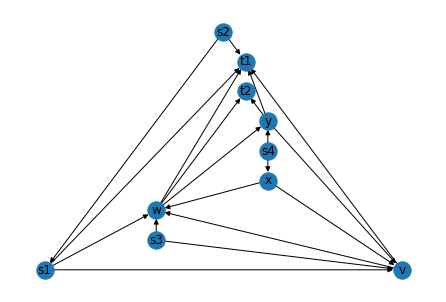

In [6]:
planar(graph)